<a href="https://colab.research.google.com/github/m17moud/Supervised-Learning/blob/main/Video_data_set_Netflix_youtube(RF%2CDT%2CLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Link** -->* https://www.kaggle.com/datasets/aminmb2800/per-title-encoding*

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error , r2_score
from scipy import stats

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   s_video_id                                            10570 non-null  int64  
 1   s_width                                               10570 non-null  int64  
 2   s_height                                              10570 non-null  int64  
 3   s_storage_size                                        10570 non-null  int64  
 4   s_duration                                            10570 non-null  int64  
 5   s_scan_type                                           10570 non-null  object 
 6   c_content_category                                    10323 non-null  object 
 7   c_si                                                  9764 non-null   float64
 8   c_ti                                                  97

In [24]:
missing_values = data.isnull().sum()
print("Missing Values Before Handling:")
print(missing_values[missing_values > 0])

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data[col].isnull().any():  # Check if there are any nulls
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in {col} with mode: {mode_value}")

drop_cols = ['t_average_vmaf_mobile', 't_average_vmaf_4k', 't_average_psnr']
data.drop(columns=drop_cols, inplace=True, errors='ignore')

remaining_missing_values = data.isnull().sum()
print("\nRemaining Missing Values After Handling:")
print(remaining_missing_values[remaining_missing_values > 0])

Missing Values Before Handling:
c_content_category                                      247
c_si                                                    806
c_ti                                                    806
c_colorhistogram_mean_dark                              156
c_colorhistogram_mean_medium_dark                       156
c_colorhistogram_mean_medium_bright                     156
c_colorhistogram_mean_bright                            156
c_colorhistogram_std_dev_dark                           156
c_colorhistogram_std_dev_medium_dark                    156
c_colorhistogram_std_dev_medium_bright                  156
c_colorhistogram_std_dev_bright                         156
c_colorhistogram_temporal_mean_std_dev_dark             156
c_colorhistogram_temporal_mean_std_dev_medium_dark      156
c_colorhistogram_temporal_mean_std_dev_medium_bright    156
c_colorhistogram_temporal_mean_std_dev_bright           156
e_codec                                                 179
e_codec_

In [25]:
data.isnull().sum()

,0
s_video_id,0
s_width,0
s_height,0
s_storage_size,0
s_duration,0
s_scan_type,0
c_content_category,0
c_si,0
c_ti,0
c_scene_change_ffmpeg_ratio30,0


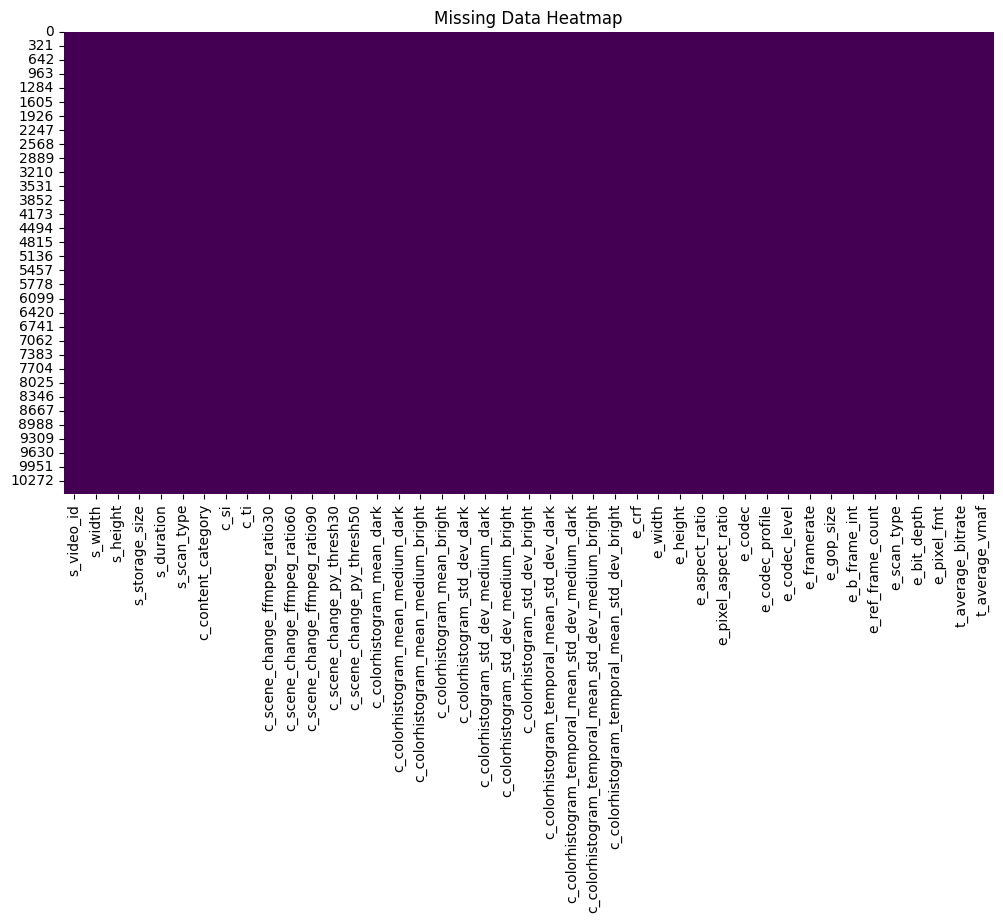

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


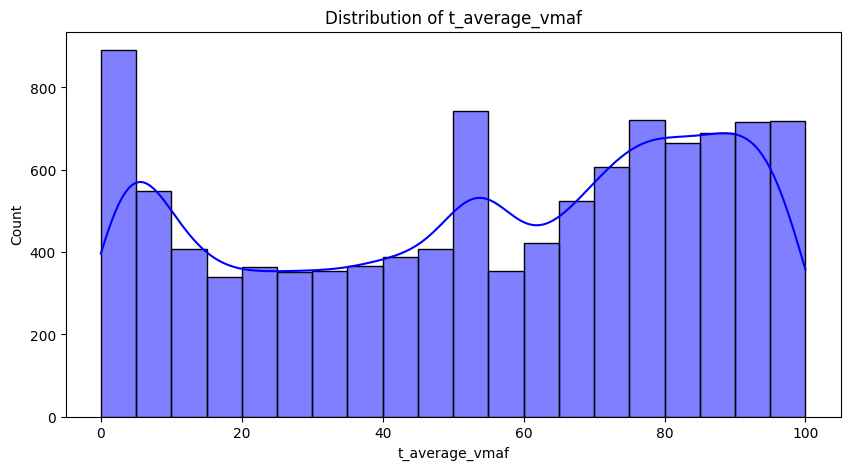

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(data['t_average_vmaf'], kde=True, color='blue')
plt.title('Distribution of t_average_vmaf')
plt.show()

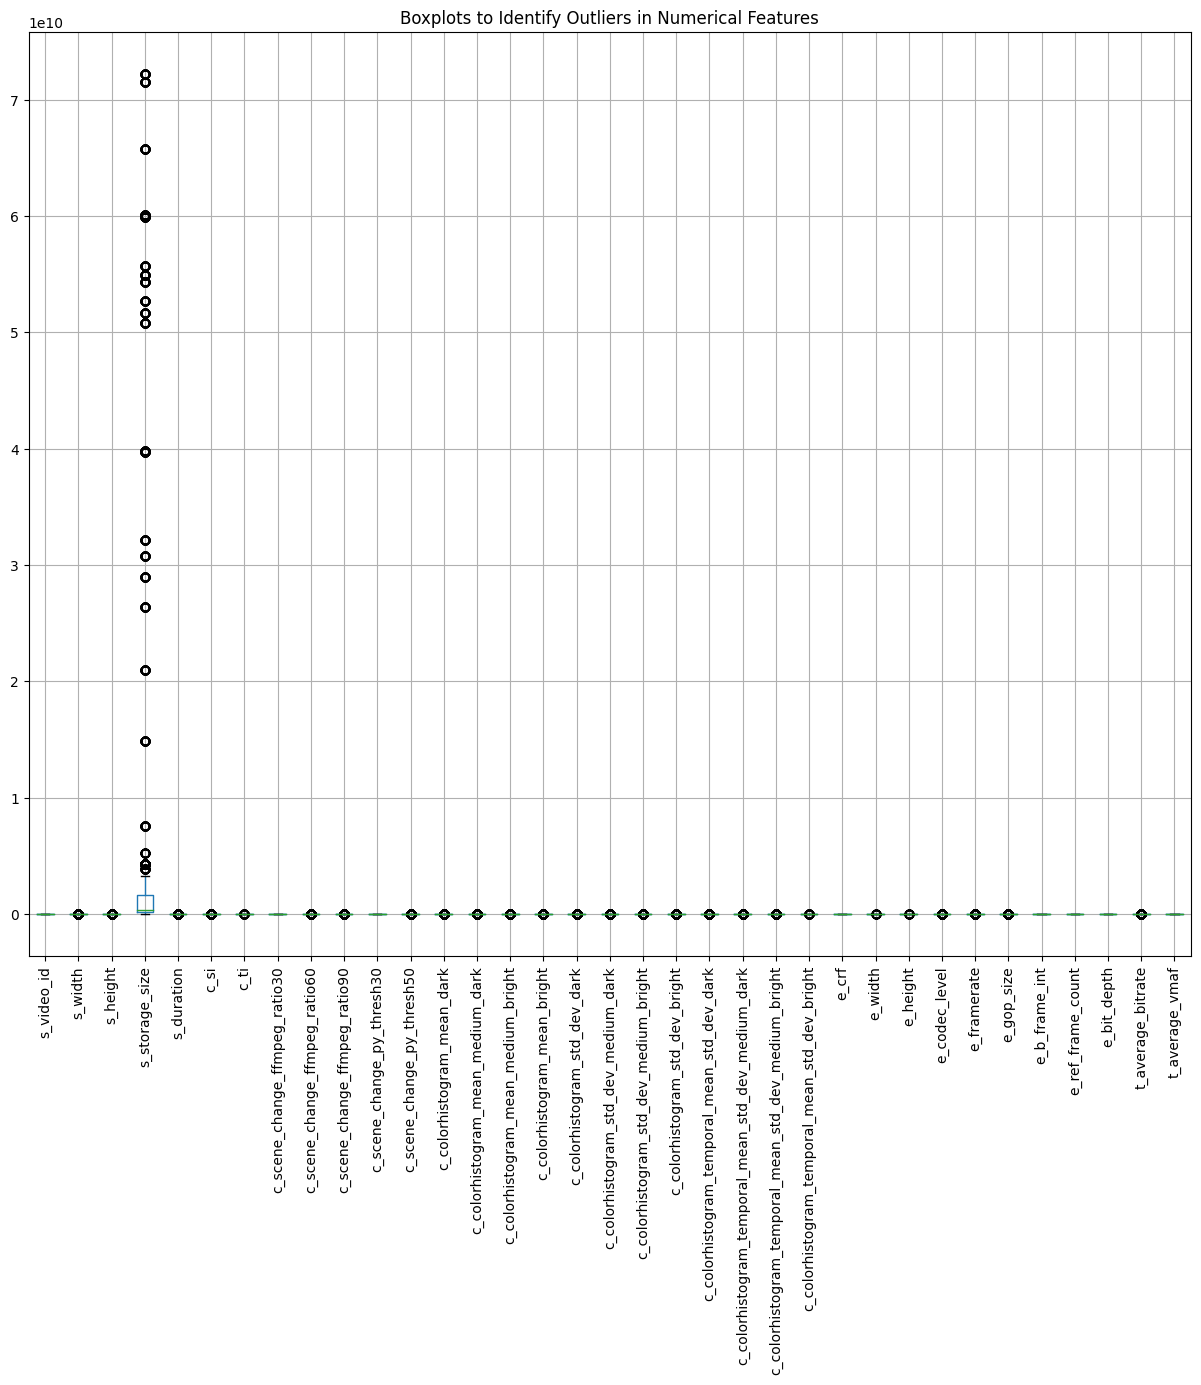

In [28]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 12))
data[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots to Identify Outliers in Numerical Features')
plt.show()

In [29]:
target_column = 't_average_vmaf'

if target_column not in data.columns:
    raise ValueError(f"The target column '{target_column}' is not in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

print("\nShape of Features (X) and Target (y):")
print(f"X shape: {X.shape}, y shape: {y.shape}")

X = pd.get_dummies(X, drop_first=True)

print("\nShape of Features after Encoding:")
print(X.shape)

if X.empty:
    raise ValueError("X is empty after encoding. Please check your feature selection.")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Shape of Features (X) and Target (y):
X shape: (10570, 42), y shape: (10570,)

Shape of Features after Encoding:
(10570, 98)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

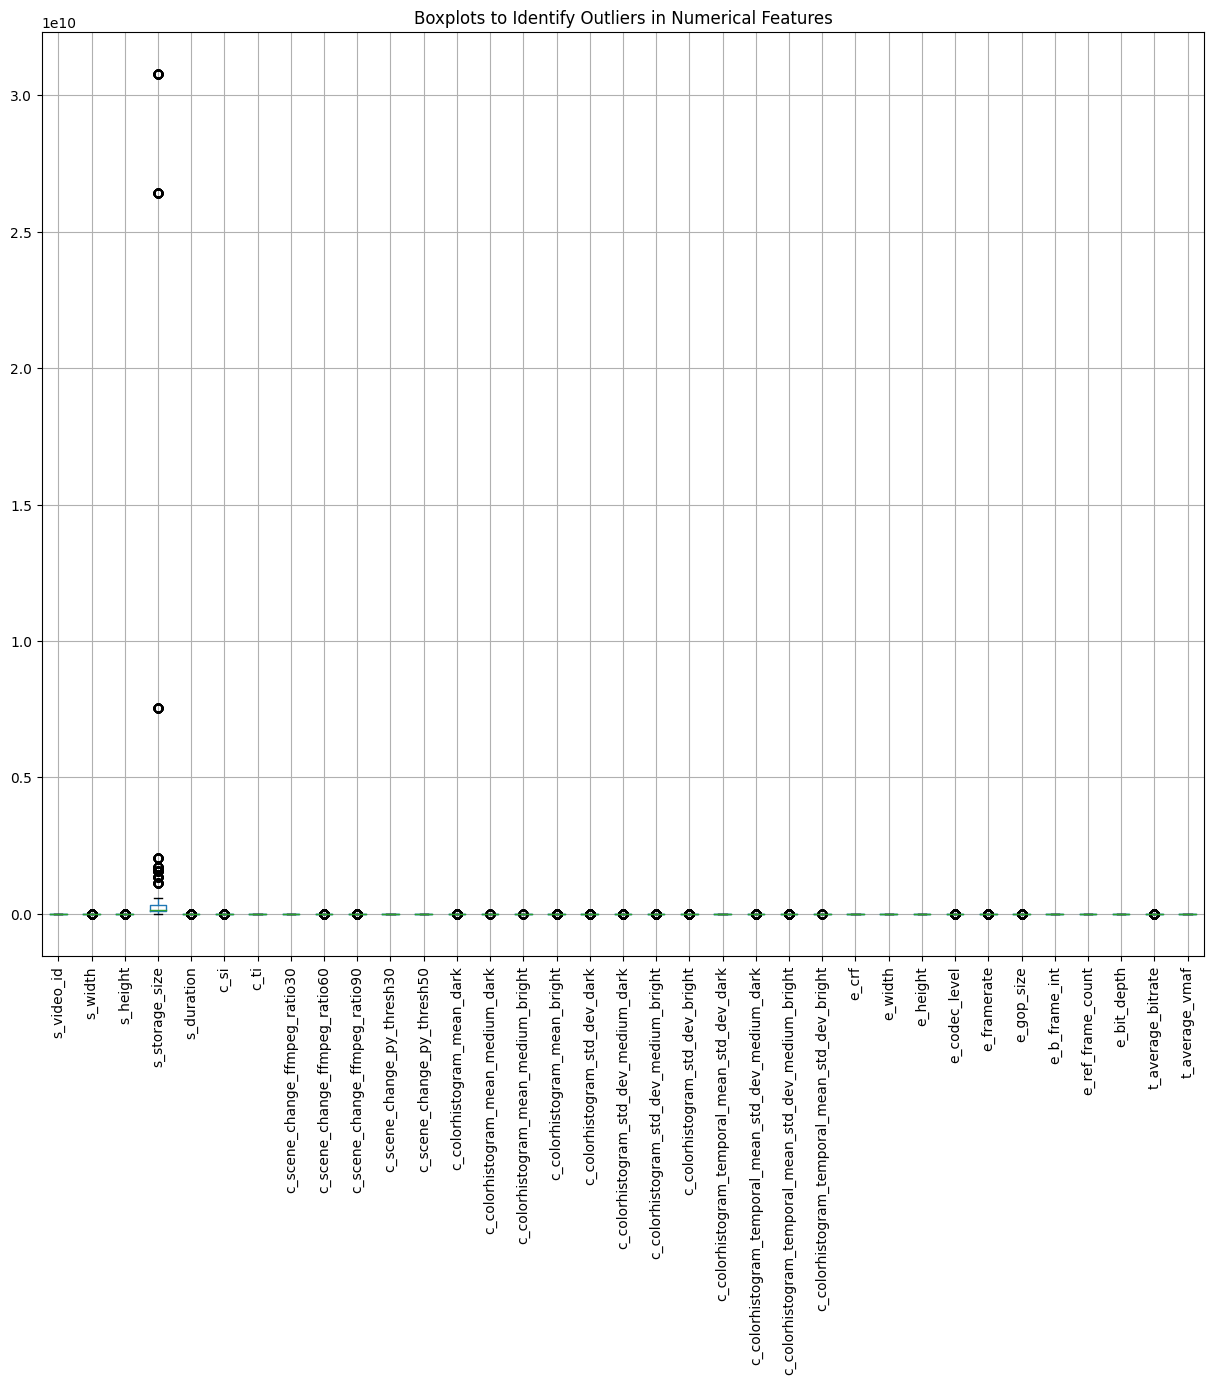

In [10]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 12))
data[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots to Identify Outliers in Numerical Features')
plt.show()

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = model.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")




Model Evaluation:
Mean Squared Error: 11.12
R^2 Score: 0.99


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")




Model Evaluation:
Mean Squared Error: 11.12
R^2 Score: 0.99


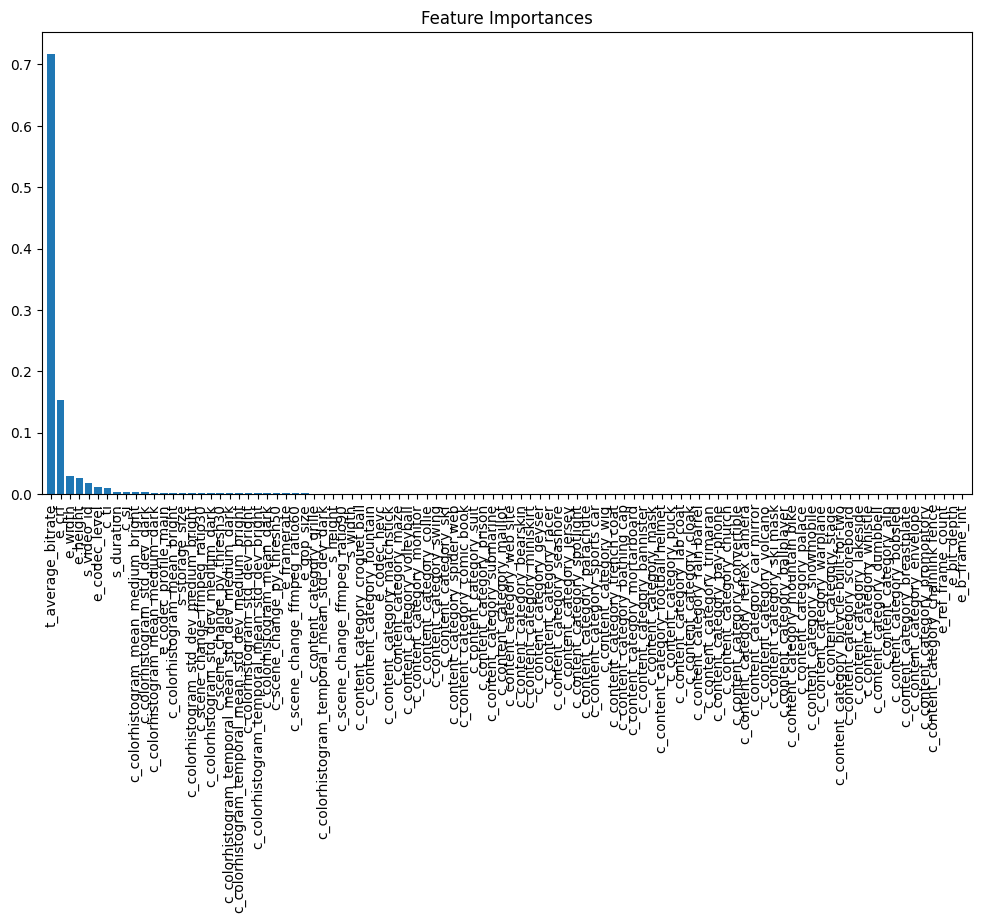

In [36]:
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



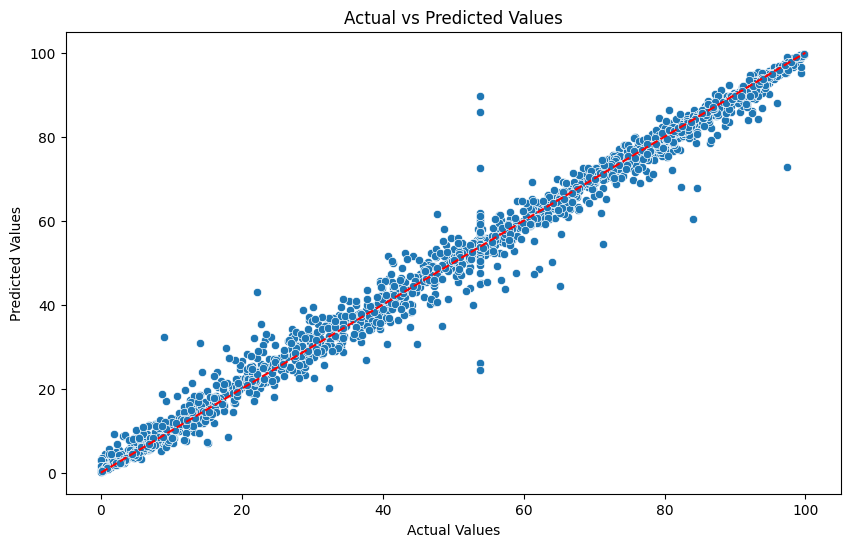

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [39]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = linear_model.predict(X_test)

In [42]:
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"R^2 Score: {r2:.2f}")




Model Evaluation:
R^2 Score: 0.90


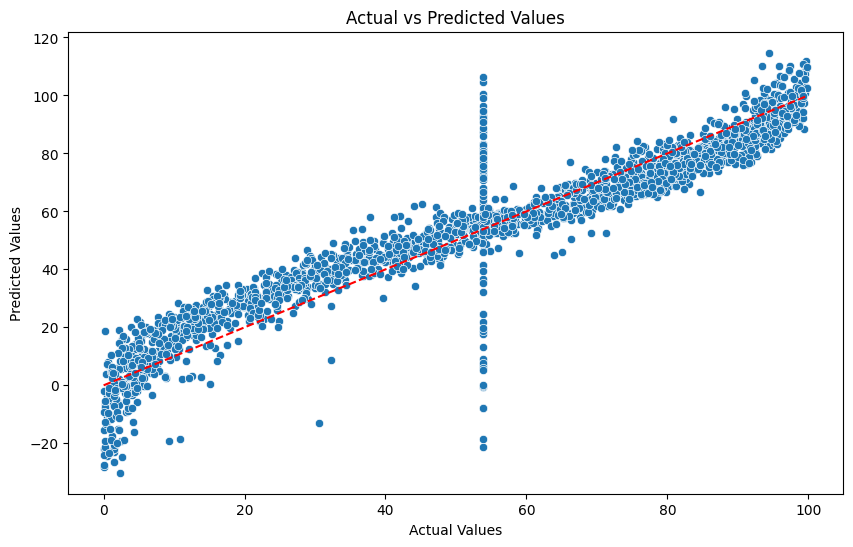

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [44]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
y_pred = tree_model.predict(X_test)

In [46]:
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"R^2 Score: {r2:.2f}")



Model Evaluation:
R^2 Score: 0.97


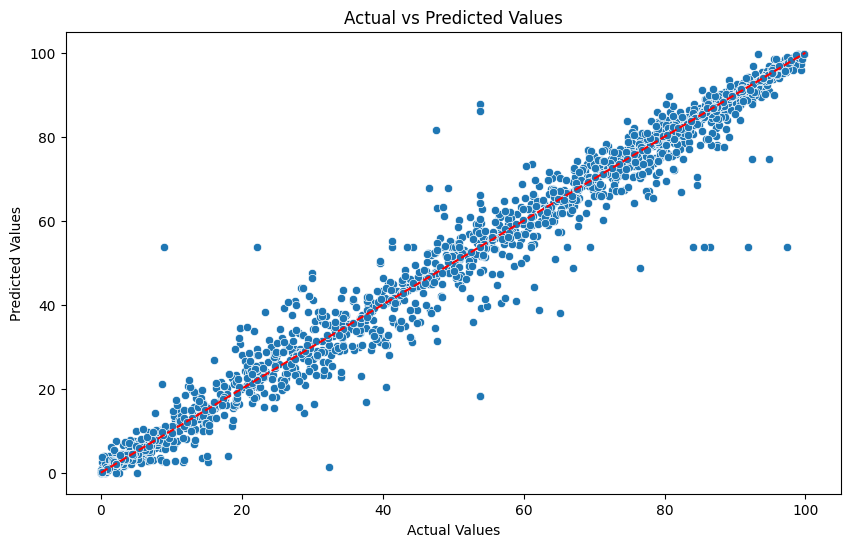

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()